<a href="https://colab.research.google.com/github/gankidisaicharan/MajorProject/blob/main/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
df = pd.read_csv('/content/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80317,ZWE,Africa,Zimbabwe,2021-04-04,36923.0,12.0,14.429,1525.0,1.0,0.714,2484.235,0.807,0.971,102.604,0.067,0.048,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1115.0,443188.0,29.818,0.075,1640.0,0.110,0.009,113.7,tests performed,138900.0,117297.0,21603.0,5985.0,8537.0,0.93,0.79,0.15,574.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
80318,ZWE,Africa,Zimbabwe,2021-04-05,36934.0,11.0,13.571,1525.0,0.0,0.714,2484.975,0.740,0.913,102.604,0.000,0.048,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1171.0,444359.0,29.897,0.079,1597.0,0.107,0.008,117.7,tests performed,145510.0,123454.0,22056.0,6610.0,9129.0,0.98,0.83,0.15,614.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
80319,ZWE,Africa,Zimbabwe,2021-04-06,36966.0,32.0,18.143,1531.0,6.0,1.571,2487.128,2.153,1.221,103.008,0.404,0.106,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1604.0,445963.0,30.005,0.108,1444.0,0.097,0.013,79.6,tests performed,162633.0,139133.0,23500.0,17123.0,10967.0,1.09,0.94,0.16,738.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0

In [17]:
df = df.rename(columns={'date':'ds','total_cases':'y'})
df

,iso_code,continent,location,ds,y,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80317,ZWE,Africa,Zimbabwe,2021-04-04,36923.0,12.0,14.429,1525.0,1.0,0.714,2484.235,0.807,0.971,102.604,0.067,0.048,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1115.0,443188.0,29.818,0.075,1640.0,0.110,0.009,113.7,tests performed,138900.0,117297.0,21603.0,5985.0,8537.0,0.93,0.79,0.15,574.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
80318,ZWE,Africa,Zimbabwe,2021-04-05,36934.0,11.0,13.571,1525.0,0.0,0.714,2484.975,0.740,0.913,102.604,0.000,0.048,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1171.0,444359.0,29.897,0.079,1597.0,0.107,0.008,117.7,tests performed,145510.0,123454.0,22056.0,6610.0,9129.0,0.98,0.83,0.15,614.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
80319,ZWE,Africa,Zimbabwe,2021-04-06,36966.0,32.0,18.143,1531.0,6.0,1.571,2487.128,2.153,1.221,103.008,0.404,0.106,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1604.0,445963.0,30.005,0.108,1444.0,0.097,0.013,79.6,tests performed,162633.0,139133.0,23500.0,17123.0,10967.0,1.09,0.94,0.16,738.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
80320,Z

In [18]:
df_new=df[['ds','y','location']]
df_new

,ds,y,location
0,2020-02-24,1.0,Afghanistan
1,2020-02-25,1.0,Afghanistan
2,2020-02-26,1.0,Afghanistan
3,2020-02-27,1.0,Afghanistan
4,2020-02-28,1.0,Afghanistan
...,...,...,...
80317,2021-04-04,36923.0,Zimbabwe
80318,2021-04-05,36934.0,Zimbabwe
80319,2021-04-06,36966.0,Zimbabwe
80320,2021-04-07,36984.0,Zimbabwe


In [19]:
df_new.isnull().sum()

ds             0
y           1628
location       0
dtype: int64

In [20]:
df_new = df_new.dropna()
df_new

,ds,y,location
0,2020-02-24,1.0,Afghanistan
1,2020-02-25,1.0,Afghanistan
2,2020-02-26,1.0,Afghanistan
3,2020-02-27,1.0,Afghanistan
4,2020-02-28,1.0,Afghanistan
...,...,...,...
80317,2021-04-04,36923.0,Zimbabwe
80318,2021-04-05,36934.0,Zimbabwe
80319,2021-04-06,36966.0,Zimbabwe
80320,2021-04-07,36984.0,Zimbabwe


In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78694 entries, 0 to 80321
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ds        78694 non-null  object 
 1   y         78694 non-null  float64
 2   location  78694 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.4+ MB


In [22]:
df_new['ds'] = pd.to_datetime(df_new['ds'])
df_new['y'] = df_new['y'].astype(int)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78694 entries, 0 to 80321
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ds        78694 non-null  datetime64[ns]
 1   y         78694 non-null  int64         
 2   location  78694 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.4+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
print("Most Effected country is")
column = df_new["y"]
max_value = column.max()
max_value
c = df_new.loc[df_new['y'] == max_value]
print(c)

Most Effected country is
              ds          y location
79185 2021-04-08  133943335    World


In [24]:
df_new=df_new[df_new['location'].str.contains('India', regex=False)]
df_new

,ds,y,location
32969,2020-01-30,1,India
32970,2020-01-31,1,India
32971,2020-02-01,1,India
32972,2020-02-02,2,India
32973,2020-02-03,3,India
...,...,...,...
33399,2021-04-04,12589067,India
33400,2021-04-05,12686049,India
33401,2021-04-06,12801785,India
33402,2021-04-07,12928574,India


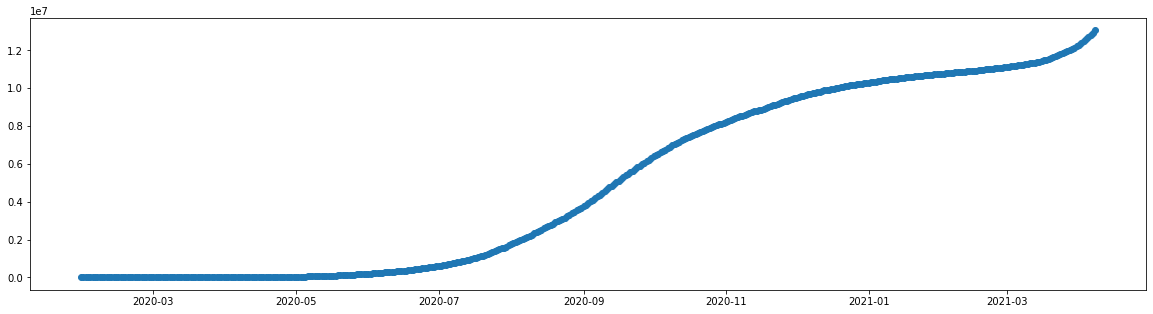

In [25]:
# Plot a graph of Date vs Active cases
 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(df_new['ds'],df_new['y'])
plt.show()

In [26]:
from fbprophet import Prophet

In [27]:
model = Prophet(changepoint_prior_scale=1)
# Overfit,Underfit and Bestfit
model.fit(df_new)
forecast = model.make_future_dataframe(periods=30,freq='D')
forecast = model.predict(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-30,6426.327587,-138601.943498,135755.219574
1,2020-01-31,-5410.551270,-142582.456029,127416.947305
2,2020-02-01,-2290.542368,-144000.614741,147674.795319
3,2020-02-02,-785.565734,-141987.651235,138009.541660
4,2020-02-03,-3023.490884,-147727.877680,136586.921962


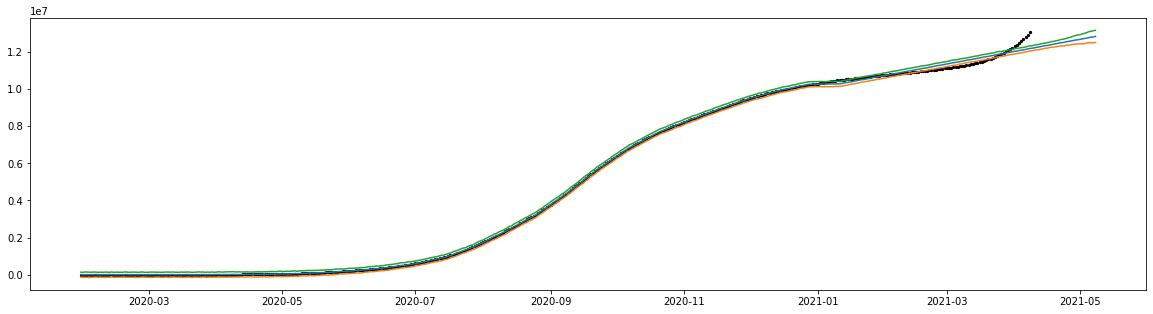

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(df_new['ds'],df_new['y'],s=5,c='k')
plt.plot(forecast['ds'],forecast['yhat'])
plt.plot(forecast['ds'],forecast['yhat_lower'])
plt.plot(forecast['ds'],forecast['yhat_upper'])
plt.show()

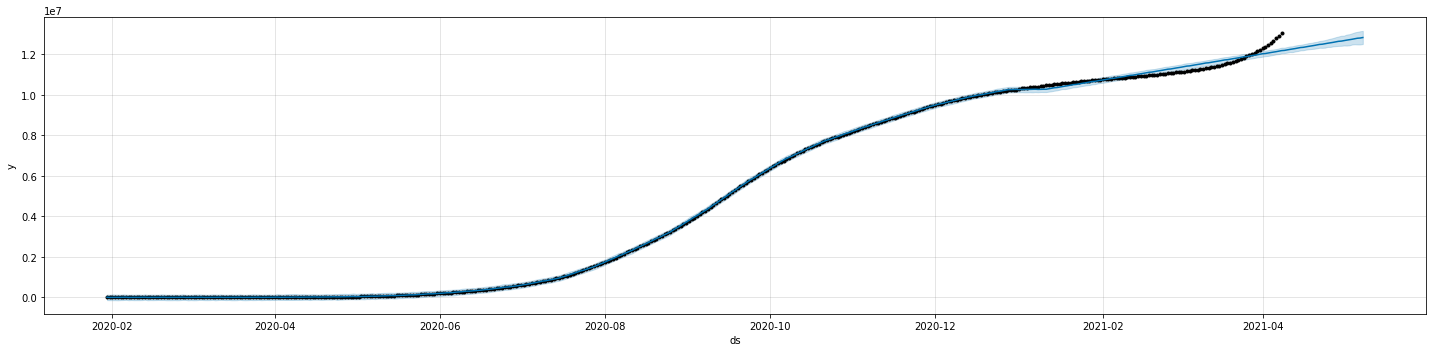

In [30]:
# Pandas plotting
 
model.plot(forecast,figsize=(20,5));